In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

data_path = '../../datasets/crack-detection'

print(f'Classes in dataset directory: {os.listdir(data_path)}')

Classes in dataset directory: ['Negative', 'Positive']


In [48]:
negative_count = len(os.listdir(data_path + '/Negative/'))
positive_count = len(os.listdir(data_path + '/Positive/'))

print(f'There are {negative_count} negative and {positive_count} positive samples.')

There are 20000 negative and 20000 positive samples.


In [49]:
image_folder = datasets.ImageFolder(data_path)
len(image_folder)

train_size = int(0.5 * len(image_folder))
valid_size = int(0.3 * len(image_folder))
test_size  = len(image_folder) - (train_size + valid_size)

train_ds, valid_ds, test_ds = torch.utils.data.random_split(image_folder, [train_size, valid_size, test_size])

print(f'There are {len(train_ds)} train., {len(valid_ds)} valid. and {len(test_ds)} test samples.')

There are 20000 train., 12000 valid. and 8000 test samples.


In [50]:
 
train_ds.dataset.transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_ds.dataset.transform =  transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_ds.dataset.transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [51]:
train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=4, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_ds, batch_size=4, shuffle=False)
test_dataloader  = torch.utils.data.DataLoader(test_ds,  batch_size=4, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


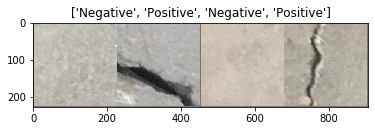

In [52]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# image_folder.classes
# Get a batch of training data
inputs, classes = next(iter(train_dataloader))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[train_ds.dataset.classes[x] for x in classes])